# Lineare Regression
## Anwendungsszenario: Vorhersage des Wohnungspreises basierend auf der Wohnfläche
### Ein- und Ausgaben:
- Feature: Fläche in Quadratmeter
- Zielvariable: Preis in Euro

### Datensatz für komplexere Modelle
- https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

Orientiere dich gerne an den entsprechenden Code-Beispielen im Skript (Lernzyklus 6.4) und schaue dir ggf. zusätzlich die Dokumentationen der jeweiligen Module an (z.B. zugreifbar über die JupyterLab Hilfe). Du kannst auch ein KI-Sprachmodell als Unterstützung verwenden. **Dieses Programmierbeispiel geht allerdings deutlich über die Inhalte des Skripts hinaus**.

In [20]:
import pandas as pd
# Lies die Daten aus der CSV-Datei regression_housing.csv ein
data = pd.read_csv("regression_housing.csv")
# Gib die ersten 10 Zeilen aus
print(data.head(10))

   Flaeche   Preis
0       50  154967
1       50  150132
2       51  159507
3       51  169775
4       52  153719
5       52  155234
6       53  174883
7       53  168280
8       54  157426
9       54  169061


In [21]:
# Extrahiere die Werte für Fläche und Preis in die Variablen "area" und "price" als NumPy-Arrays. 
# Der Zugriff kann über die Labels erfolgen.
area = data["Flaeche"].to_numpy() # Quadratmeterzahl -> unabhängige Variable
price = data["Preis"].to_numpy() # Euro -> abhängige Variable

In [22]:
# Hier wird das lineare Regressionsmodell trainiert und evaluiert

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Teile den Datensatz in Trainings- und Testdaten auf
X_train, X_test, y_train, y_test = train_test_split(area.reshape(-1, 1), price.reshape(-1, 1), test_size=0.2, random_state=42)

# Trainiere ein lineares Regressionsmodell
model = LinearRegression()
model.fit(X_train, y_train)
print(f"y = {model.coef_[0]}*X+{model.intercept_}")

# Prädiziere die Preise für die Testdaten
predictions = model.predict(X_test)

# Berechne den mittleren Fehler
mae = mean_absolute_error(y_test, predictions)
print(f"Mittlerer absoluter Fehler [Euro]: {mae:.2f}")


y = [3046.27954013]*X+[-3140.9629523]
Mittlerer absoluter Fehler [Euro]: 6021.96


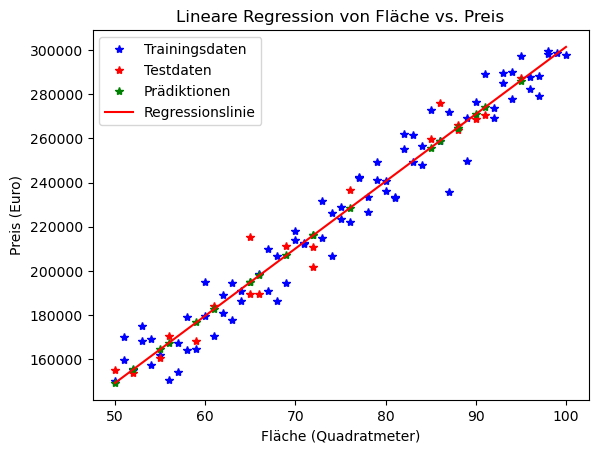

In [23]:
# Visualisierung

import matplotlib.pyplot as plt
import numpy as np

# Plotte alle Datenpunkte (Trainingsdaten, Testdaten, Prädiktionen in unterschiedlichen Farben)
plt.plot(X_train, y_train, "b*", label="Trainingsdaten")
plt.plot(X_test, y_test, "r*", label="Testdaten")
plt.plot(X_test, predictions, "g*", label="Prädiktionen")

# Plotte die Regressionslinie
line_x = np.array([min(area), max(area)])
line_y = model.predict(line_x.reshape(-1, 1))
plt.plot(line_x, line_y, "r-", label="Regressionslinie")

# Ergänze Beschriftungen
plt.xlabel("Fläche (Quadratmeter)")
plt.ylabel("Preis (Euro)")
plt.title("Lineare Regression von Fläche vs. Preis")
plt.legend()
plt.show()

In [ ]:
# Schreibe ein Programm, dass die Eingabe einer Wohnfläche anfragt und dann den dafür prädizierten Preis ausgibt

# Funktion zur Prädiktion für einen einzelnen Eingabewert
def predict(input):
    arr = np.array([input])
    prediction = model.predict(arr.reshape(-1, 1))
    return prediction[0][0]

# Eingabeaufforderung
user_input = input("Geben Sie eine Wohnfläche in Quadratmeter ein: ")

# Funktionsaufruf
result = predict(int(user_input))
# Ausgabe der Prädiktion
print(f"Der prädizierte Preis liegt bei {result:.2f} Euro.")